# import Library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import sklearn untuk standardscaler standarisasi data
from sklearn.preprocessing import StandardScaler 

# Import sklearn untuk menangani nilai NULL
from sklearn.impute import SimpleImputer

# Import sklearn untuk memasukkan KMeans
from sklearn.cluster import KMeans

# Membaca Dataset

In [46]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# Melakukan Cleaning 
## Menangani Nilai NULL Pada dataset

In [3]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())
df['bath'] = df['bath'].fillna(df['bath'].mean())
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['society'] = df['society'].fillna(df['society'].mode()[0])
df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [6]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,2.0,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,2.0,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,GrrvaGr,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,GrrvaGr,1020,6.0,2.0,370.00


## Menangani nilai Duplikat

In [7]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,GrrvaGr,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,GrrvaGr,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,GrrvaGr,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,GrrvaGr,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [12]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [13]:
df.duplicated().sum()

0

# data Scaling

In [16]:
df_subset = df[['balcony', 'price']]

In [17]:
ss = StandardScaler()

In [18]:
x_scaled = ss.fit_transform(df_subset)

# K-Means

In [19]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0)

In [20]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [21]:
labels = model_kmeans.labels_

In [22]:
labels

array([1, 2, 2, ..., 2, 1, 0])

# Visualisasi data

In [23]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [24]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

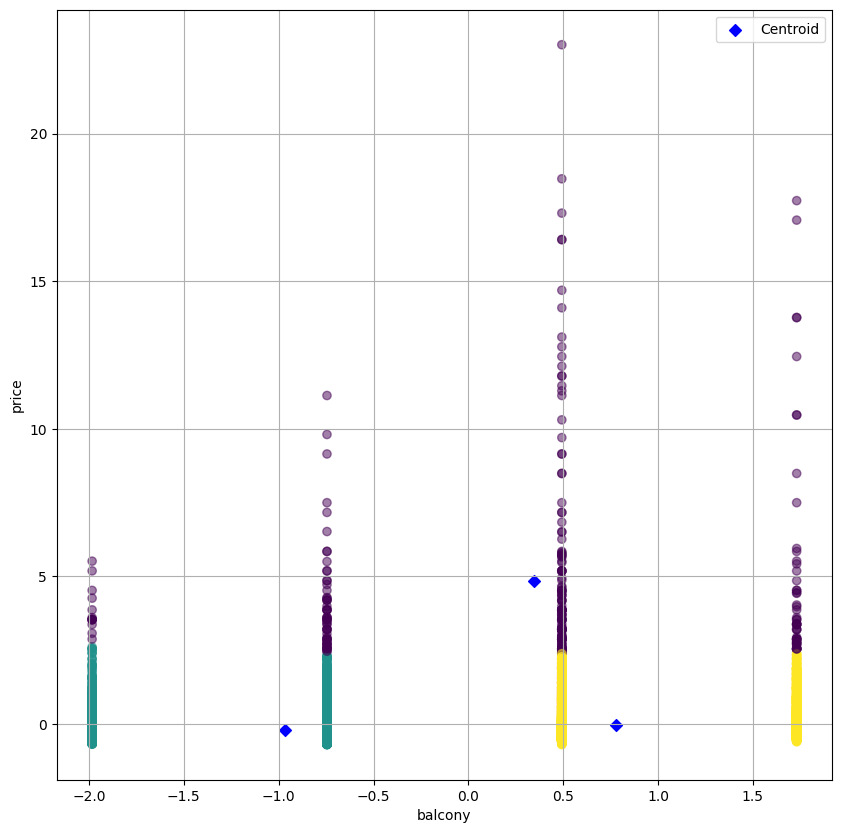

In [30]:
plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = "blue", marker= "D", label = "Centroid")
plt.xlabel("balcony")
plt.ylabel("price")
plt.grid(True)
plt.legend()
plt.show()

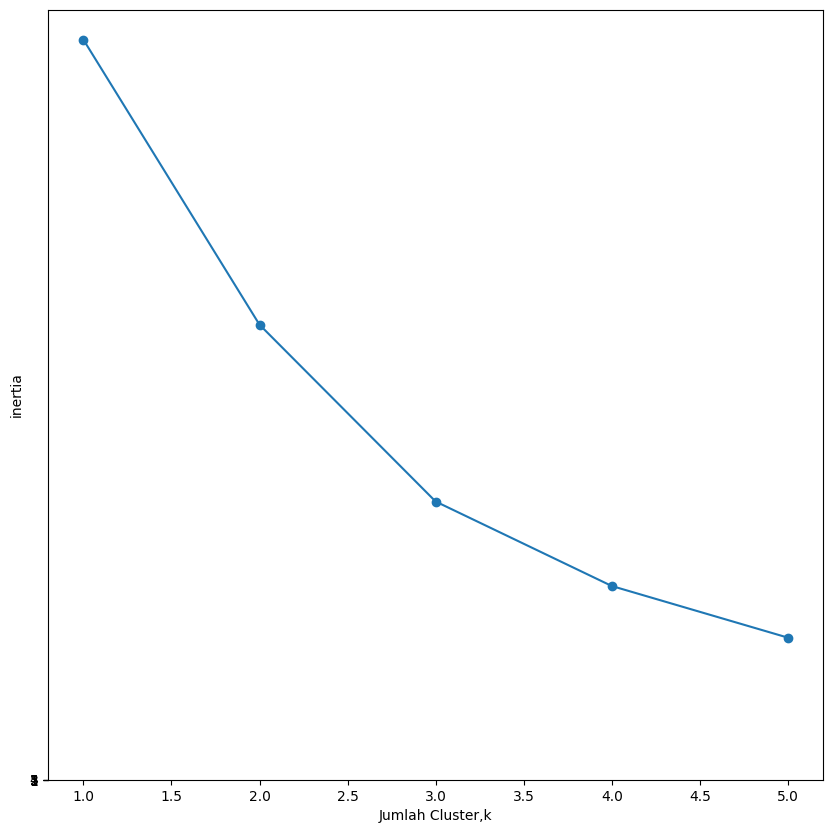

In [43]:
ks = range(1,6)
inertias = []
for k in ks:
    model =KMeans(n_clusters = k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster,k')
plt.ylabel('inertia')
plt.yticks(ks)
plt.show()

## Evaluasi K-Means dengan Cross Tab

In [37]:
df_means = pd.DataFrame({'labels' : labels, 'area_type' : df['area_type']})

In [38]:
ct1 = pd.crosstab(df_means['labels'], df_means['area_type'])

In [39]:
ct1

area_type,Built-up Area,Carpet Area,Plot Area,Super built-up Area
labels,,,,
0,30,1,146,92
1,1170,48,940,3481
2,1197,38,903,4744


### contoh lain

In [41]:
df_means = pd.DataFrame({'labels' : labels, 'availability' : df['availability']})
ct2 = pd.crosstab(df_means['labels'], df_means['availability'])
ct2

availability,14-Jul,14-Nov,15-Aug,15-Dec,15-Jun,15-Nov,15-Oct,16-Dec,16-Jan,16-Jul,...,21-Oct,21-Sep,22-Dec,22-Jan,22-Jun,22-Mar,22-May,22-Nov,Immediate Possession,Ready To Move
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,220
1,0,0,0,1,1,0,0,1,1,1,...,6,5,9,4,5,2,3,0,0,4137
2,1,1,1,0,0,2,2,3,0,0,...,0,1,2,2,14,1,7,2,16,5814
